<a href="https://colab.research.google.com/github/lakshya1729git/Google_ML-Exercises/blob/main/Copy_of_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview


House price prediction is a regression problem, where we predict a continuous numerical value (house price) based on given features like area, number of bedrooms, location index, etc.
We’ll use Linear Regression, one of the simplest and most powerful ML models, to train our model and make predictions.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


numpy – Used for numerical operations.

pandas – Helps handle datasets in table format (DataFrames).

matplotlib.pyplot – Used for visualization (plots & graphs).

seaborn – An advanced visualization library to create better-looking graphs.

sklearn.model_selection.train_test_split – Splits the data into training & testing sets.

sklearn.linear_model.LinearRegression – ML model for predicting house prices.

sklearn.metrics – Helps evaluate model performance using error metrics.

What is Regression?
Regression is a supervised learning technique where the goal is to predict a continuous output variable. In this case, we are predicting house prices.

Linear Regression is used when the relationship between input (features) and output (target) is approximately linear.
It finds the best-fit line by minimizing the error between predicted and actual values.
The Mathematical Equation of Linear Regression is:

𝑦
=
𝑚
1
𝑥
1
+
𝑚
2
𝑥
2
+
.
.
.
+
𝑚
𝑛
𝑥
𝑛
+
𝑏
y=m
1
​
 x
1
​
 +m
2
​
 x
2
​
 +...+m
n
​
 x
n
​
 +b
where:

𝑦
y = predicted price
𝑥
1
,
𝑥
2
,
.
.
.
𝑥
𝑛
x
1
​
 ,x
2
​
 ,...x
n
​
  = features (area, bedrooms, etc.)
𝑚
1
,
𝑚
2
,
.
.
.
𝑚
𝑛
m
1
​
 ,m
2
​
 ,...m
n
​
  = coefficients (weights learned by the model)
𝑏
b = bias (intercept)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving housing_test.csv to housing_test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving housing_train.csv to housing_train.csv


Now we will load the dataset using Pandas

In [ ]:
import os
print(os.listdir())  # This will list all files in the current directory


['.config', 'housing_test.csv', 'housing_train.csv', 'sample_data']


In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/housing_test.csv")
df_test = pd.read_csv("/content/housing_test.csv")

print("Train Data:")
print(df_train.head())

print("\nTest Data:")
print(df_test.head())


Train Data:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0   

 Checking for Missing Values

Before training a model, it's crucial to check for missing values. Let's find out how many missing values each column has. Run the following code:

In [ ]:
# Check for missing values
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print("Missing Values in Training Data:\n", missing_values)


Missing Values in Training Data:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
# Filling categorical missing values with 'None'
categorical_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in categorical_cols:
    df_train[col].fillna("None", inplace=True)

# Filling numerical missing values with median
numerical_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in numerical_cols:
    df_train[col].fillna(df_train[col].median(), inplace=True)

# Filling 'Electrical' column with mode (most frequent value)
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

# Check again to confirm no missing values
print("Missing values after filling:\n", df_train.isnull().sum().sum())


Missing values after filling:
 22


<ipython-input-42-a2ddbd26b227>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna("None", inplace=True)
<ipython-input-42-a2ddbd26b227>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Convert Categorical Features into Numeric Form

Since ML models work with numbers, we need to transform categorical features using label encoding or one-hot encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Apply Label Encoding for ordinal categories (if applicable)
label_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
label_mapping = {
    "None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

for col in label_cols:
    df_train[col] = df_train[col].map(label_mapping)

# Apply One-Hot Encoding for other categorical features
df_train = pd.get_dummies(df_train, columns=[col for col in categorical_cols if col not in label_cols], drop_first=True)

print("Shape after encoding:", df_train.shape)


Shape after encoding: (1459, 224)


 Feature Scaling (For Better Model Performance)

Feature scaling helps models converge faster. We'll apply MinMax Scaling or Standard Scaling based on the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

print("Feature Scaling Completed.")


Feature Scaling Completed.


 Train-Test Split & Model Selection

Now, let's split the dataset and choose a model.

In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable
target = 'SalePrice'
X = df_train.drop(columns=[target])
y = df_train[target]

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed.")


KeyError: "['SalePrice'] not found in axis"

 Model Training & Evaluation
Let's start with a Linear Regression Model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.4f}")


MAE: 0.26, MSE: 0.44, R² Score: 0.6371


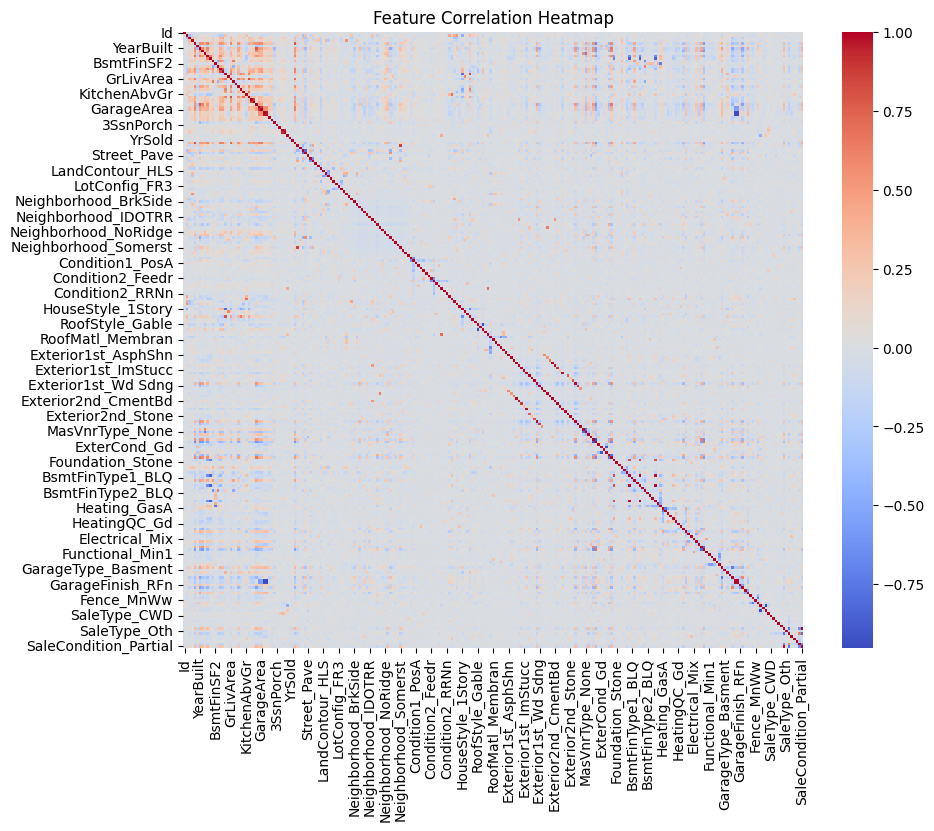

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot feature correlation with SalePrice
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest R² Score:", r2_score(y_test, y_rf_pred))


Random Forest R² Score: 0.8883937974307696


In [ ]:
import pandas as pd

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))  # Top 10 features


        Feature  Importance
4   OverallQual    0.555317
18    GrLivArea    0.122164
14  TotalBsmtSF    0.034902
16     2ndFlrSF    0.034092
11   BsmtFinSF1    0.028408
15     1stFlrSF    0.025466
3       LotArea    0.017489
30   GarageArea    0.014820
6     YearBuilt    0.012728
29   GarageCars    0.011552


In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_rf_pred))


Random Forest R² Score: 0.8879232255479268


In [ ]:
df_train.isnull().sum() # or df_test.isnull().sum() depending on which dataset you want to check


,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
...,...
SaleCondition_AdjLand,0
SaleCondition_Alloca,0
SaleCondition_Family,0
SaleCondition_Normal,0


In [ ]:
# Get the list of existing columns in df_train
existing_columns = df_train.columns.tolist()

# Check if the columns to be dropped are present in the DataFrame
columns_to_drop = ['unnecessary_column1', 'unnecessary_column2']
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop only the existing columns
if columns_to_drop:  # Check if there are any valid columns to drop
    df_train.drop(columns=columns_to_drop, inplace=True)
else:
    print("None of the specified columns were found in the DataFrame.")



None of the specified columns were found in the DataFrame.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_train is the DataFrame you want to scale
# Get numerical features from df_train
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Select the first two numerical features for scaling (replace with your desired columns if needed)
num_cols_to_scale = numerical_features[:2]

# Apply Standard Scaling to selected columns
scaler = StandardScaler()
df_train[num_cols_to_scale] = scaler.fit_transform(df_train[num_cols_to_scale])

In [ ]:
print(df_train.dtypes)  # Check column types
print(df_train.head())   # See first few rows


Id                       float64
MSSubClass               float64
LotFrontage              float64
LotArea                  float64
OverallQual              float64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 241, dtype: object
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtQual  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.514104  0.583168  ...           False   
1   0.1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns (excluding boolean)
num_cols_to_scale = df_train.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns to Scale:", num_cols_to_scale)

# Apply StandardScaler
scaler = StandardScaler()
df_train[num_cols_to_scale] = scaler.fit_transform(df_train[num_cols_to_scale])


Numerical Columns to Scale: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
# Identify categorical columns
cat_cols = df_train.select_dtypes(include=['object', 'bool']).columns

# Apply Label Encoding (for simplicity)
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])


In [ ]:
# Define features and target variable
X = df_train.drop(columns=['SalePrice'])  # Features (drop target column)
y = df_train['SalePrice']                 # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, max_depth=6)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.20337388900689085
Mean Squared Error (MSE): 0.10683957301846296
Root Mean Squared Error (RMSE): 0.3268632328948347
R² Score: 0.9121530712807144


In [ ]:
import os

print(os.listdir("/content"))


['.config', 'housing_test.csv', 'housing_train.csv', 'sample_data']


In [ ]:
import pandas as pd

test_data = pd.read_csv("/content/housing_test.csv")  # Use correct filename



In [ ]:
missing_cols = set(X_train.columns) - set(test_data.columns)
extra_cols = set(test_data.columns) - set(X_train.columns)

print("Missing columns in test data:", missing_cols)
print("Extra columns in test data:", extra_cols)


Missing columns in test data: set()
Extra columns in test data: set()


In [ ]:
for col in missing_cols:
    test_data[col] = 0  # Assigning a default value (0)


In [ ]:
X_test_final = test_data[X_train.columns]  # Keep only training columns
